<a href="https://colab.research.google.com/github/budennovsk/test_metro_predict/blob/budennovsk/test_predict_model_coffee_shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score



In [3]:
df = pd.read_excel('/content/dataset_renamed.xlsx')
df

,id,target,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,60,1.292717,5526.692151,0,274,56,156,249,0,0,...,33,187,3,6,3,6,0,0,1,0
1,50,1.674569,16243.183872,0,0,719,402,0,0,0,...,303,1302,9,12,11,15,0,0,0,1
2,17,1.140666,6401.230357,0,194,425,271,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,1.352501,2255.498620,0,0,0,0,1737,83,0,...,52,315,6,7,5,10,0,0,1,0
4,74,1.324726,5811.209297,0,0,71,0,0,0,0,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,112,NaN,19887.712950,0,0,193,32,0,0,0,...,185,1074,6,6,7,8,0,0,0,1
94,117,NaN,485.615204,0,1258,237,103,372,60,0,...,351,1529,9,10,10,13,0,0,1,0
95,126,NaN,2420.989438,0,146,346,16,20,0,0,...,129,437,8,10,6,14,0,0,1,0
96,144,NaN,11997.377318,0,85,414,547,0,0,0,...,91,309,10,10,9,12,0,0,1,0


In [4]:
df = df.head(81)
df

,id,target,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,60,1.292717,5526.692151,0,274,56,156,249,0,0,...,33,187,3,6,3,6,0,0,1,0
1,50,1.674569,16243.183872,0,0,719,402,0,0,0,...,303,1302,9,12,11,15,0,0,0,1
2,17,1.140666,6401.230357,0,194,425,271,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,1.352501,2255.498620,0,0,0,0,1737,83,0,...,52,315,6,7,5,10,0,0,1,0
4,74,1.324726,5811.209297,0,0,71,0,0,0,0,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9,1.129976,15800.434812,0,26,776,418,0,0,0,...,406,2118,12,13,11,15,0,0,0,1
77,18,1.202719,6720.167057,0,3,0,0,0,12,0,...,19,123,3,4,2,5,0,0,1,0
78,7,1.252003,5941.711807,0,25,18,0,0,0,0,...,98,1724,5,7,4,7,0,0,1,0
79,135,1.496835,13033.452864,0,0,214,22,0,0,0,...,614,1695,15,19,16,23,0,0,0,1


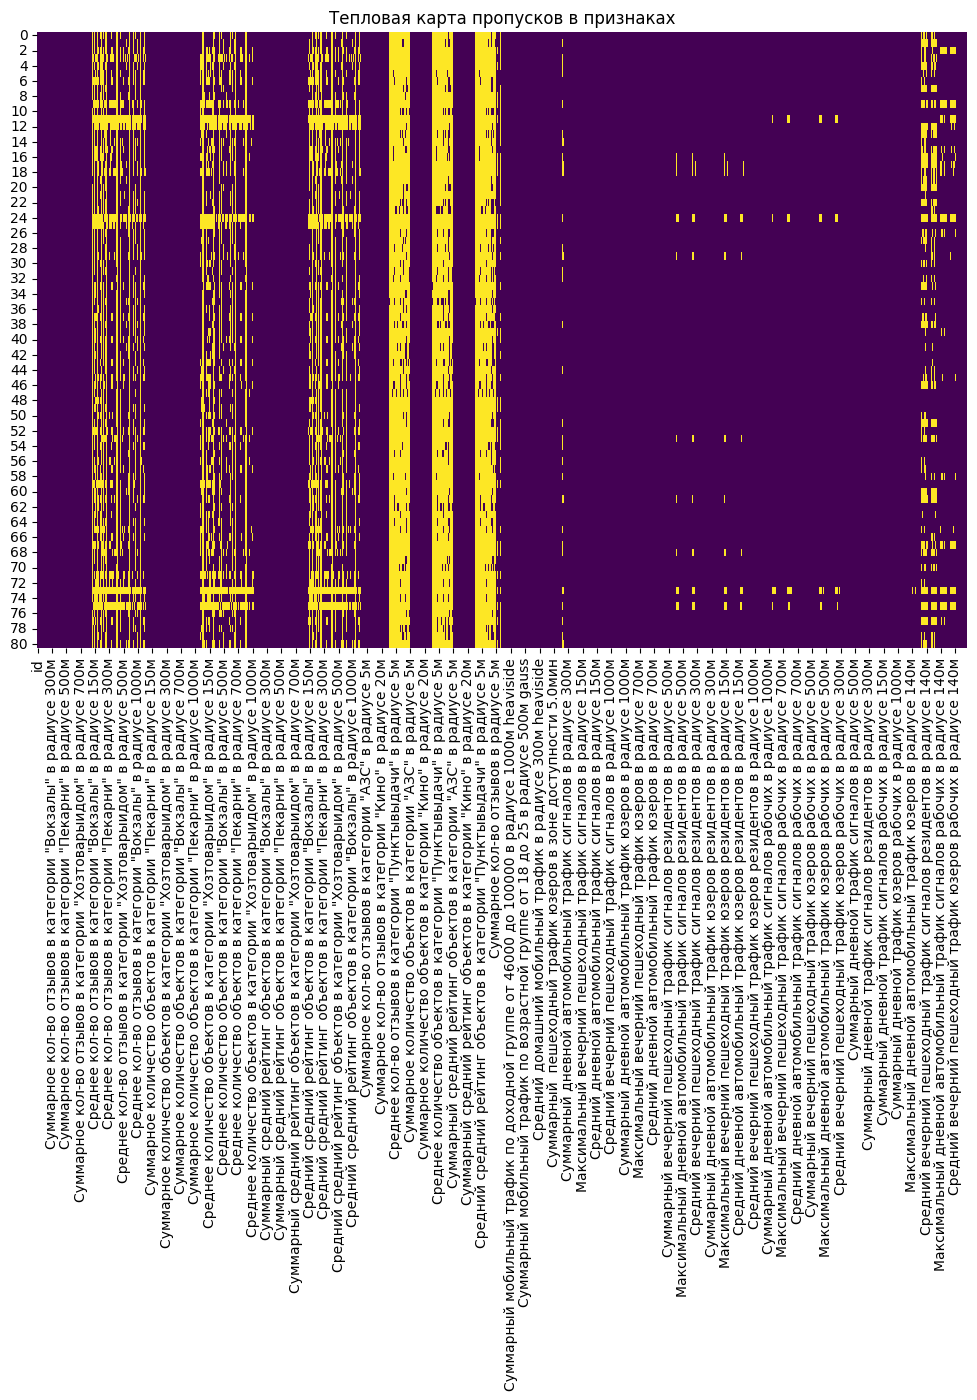

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Создание тепловой карты пропусков в признаках
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропусков в признаках')
plt.show()


In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Примерные данные (предположим, что df уже подготовлен)
# X - это признаки, а y - целевая переменная
X = df.drop(['target'], axis=1)  # Признаки
X = X.fillna(0).copy()

y = df['target']  # Целевая переменная

# Находим колонки, названия которых начинаются с "Среднее количество объектов в категории"
columns_to_find = [col for col in X.columns if col.startswith('Среднее количество объектов в категории')]

# Выводим найденные колонки
print(f"Найденные категориальные колонки: {columns_to_find}")

# Категориальные признаки (указываем индексы или названия категориальных признаков)
cat_features = ['id'] + columns_to_find  # Пример категориальных признаков
X[cat_features] = X[cat_features].astype(int)

# Разделим данные на тренировочные и тестовые (предположим, что первые 70% — это обучение, последние 30% — тест)
train_size = int(0.9 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создаем Pool для тренировочных данных
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)

# Параметры модели
params = {
    'iterations': 500,        # Количество итераций
    'depth': 4,               # Глубина деревьев
    'learning_rate': 0.1,     # Скорость обучения
    'loss_function': 'MAE',  # Основная метрика
    'verbose': 100            # Показывать процесс обучения каждые 100 итераций
}

# Выполнение кросс-валидации с 5 фолдами
cv_data = cv(
    params=params,         # Параметры модели
    pool=train_pool,       # Данные в формате Pool
    fold_count=2,          # Количество фолдов для кросс-валидации
    shuffle=True,          # Перемешивание данных перед каждой итерацией
    partition_random_seed=42,  # Для воспроизводимости
    verbose=False          # Отключение вывода результатов на экран
)

# Преобразуем результаты в DataFrame
cv_results = pd.DataFrame(cv_data)

# Вычисление средних значений по метрикам
mean_rmse = cv_results['test-MAE-mean'].values[-1]  # Средний RMSE

# Обучаем модель на всех тренировочных данных
model = CatBoostRegressor(**params)
model.fit(train_pool, verbose=False)

# Создаем Pool для тестовых данных
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

# Делаем предсказания на тестовом наборе
y_pred = model.predict(test_pool)

# Вычисляем метрики на тестовом наборе
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
# Вычисляем обычный R²
r2 = r2_score(y_test, y_pred)

# Количество наблюдений
n = len(y_test)

# Количество признаков (p)
p = X_test.shape[1]

# Вычисляем скорректированный R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Выводим результат

mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE
wape = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test)) * 100  # WAPE

# Выводим результаты метрик
print(f"Среднее значение RMSE на кросс-валидации: {mean_rmse}")
print(f"RMSE на тестовых данных: {rmse}")
print(f"Скорректированный R²: {r2_adj}")
print(f"MAPE на тестовых данных: {mape}")
print(f"WAPE на тестовых данных: {wape}")


Найденные категориальные колонки: ['Среднее количество объектов в категории "АЗС" в радиусе 150м', 'Среднее количество объектов в категории "Алкомаркеты" в радиусе 150м', 'Среднее количество объектов в категории "Аптеки" в радиусе 150м', 'Среднее количество объектов в категории "Банки" в радиусе 150м', 'Среднее количество объектов в категории "Бизнес_центры" в радиусе 150м', 'Среднее количество объектов в категории "ВУЗы" в радиусе 150м', 'Среднее количество объектов в категории "Вокзалы" в радиусе 150м', 'Среднее количество объектов в категории "Детскиемагазины" в радиусе 150м', 'Среднее количество объектов в категории "Жилыедома" в радиусе 150м', 'Среднее количество объектов в категории "Кино" в радиусе 150м', 'Среднее количество объектов в категории "Косметика" в радиусе 150м', 'Среднее количество объектов в категории "Кофейня" в радиусе 150м', 'Среднее количество объектов в категории "Метро_МЦК_ж/д" в радиусе 150м', 'Среднее количество объектов в категории "Общепит" в радиусе 150м'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


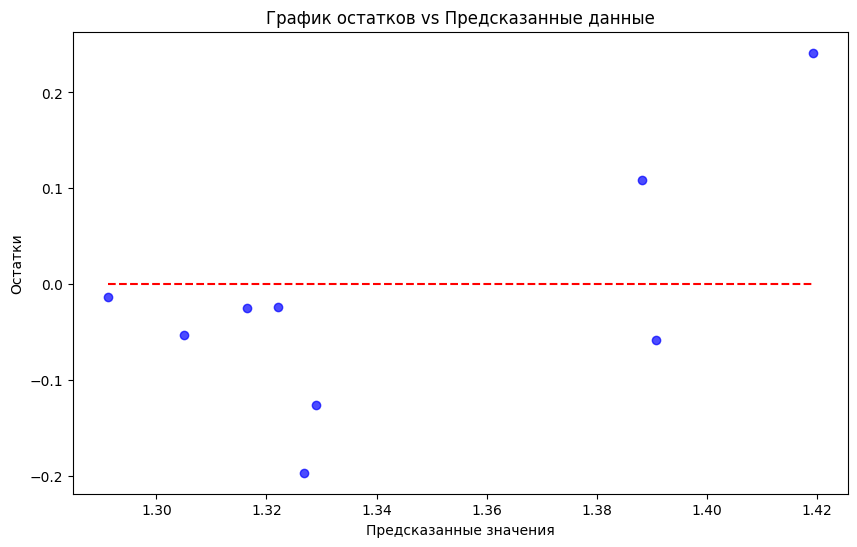

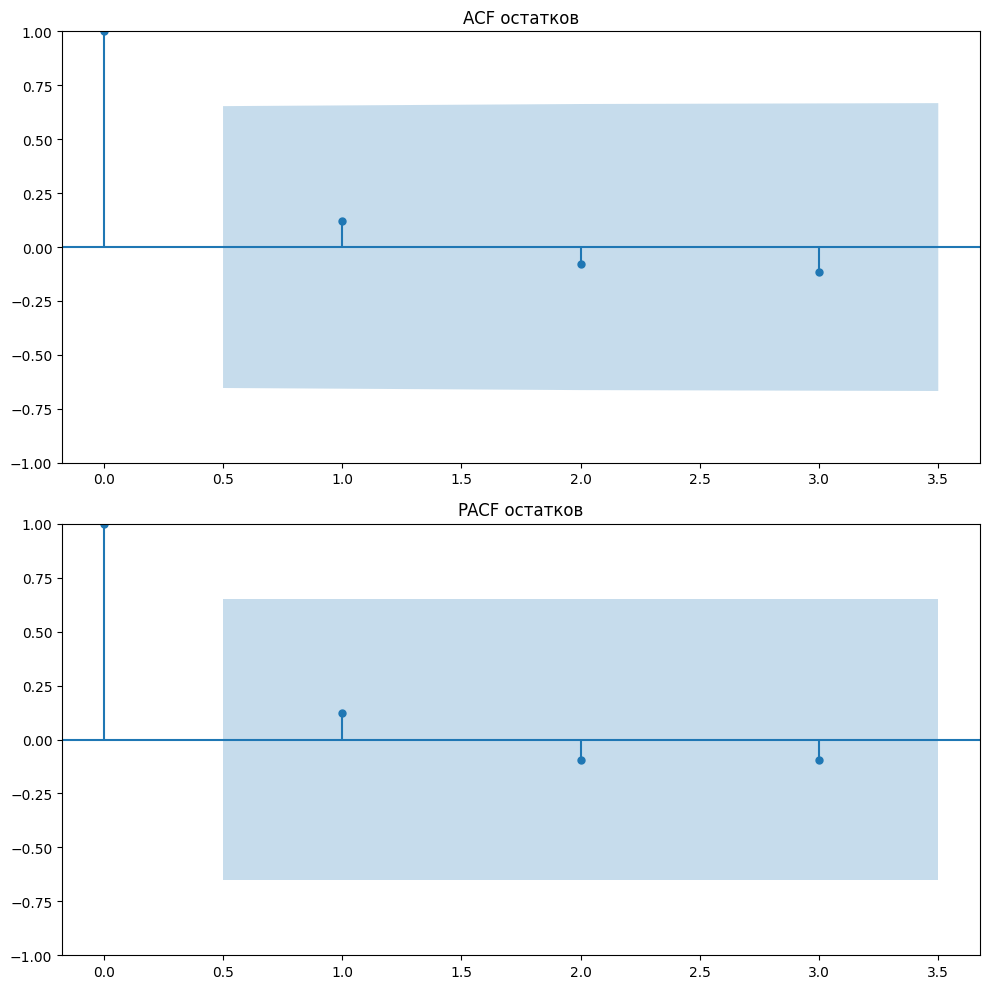

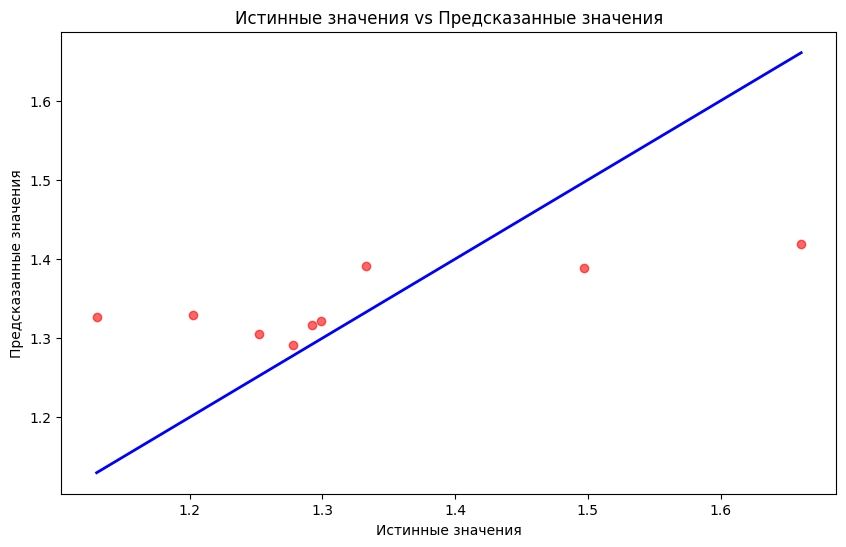

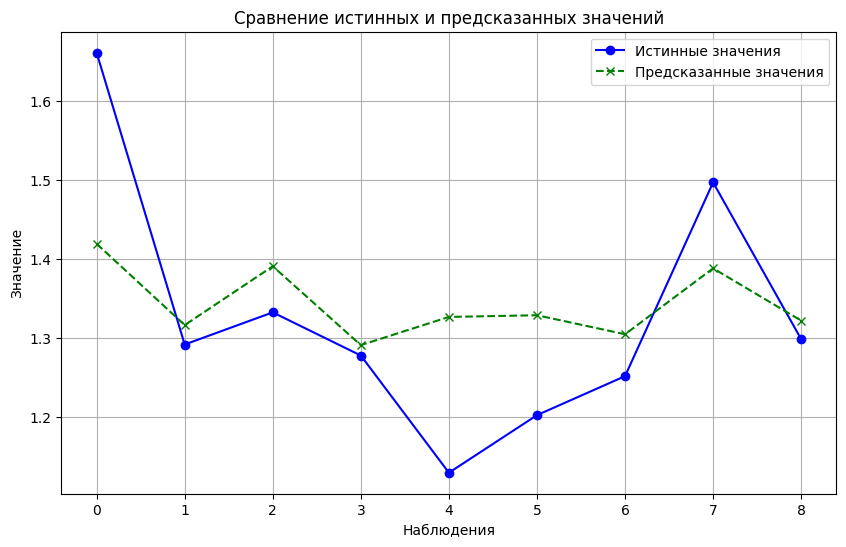

   lb_stat  lb_pvalue
3   0.4955   0.919879
P-value = 0.91988. Остатки не являются статистически значимыми и ведут себя как белый шум.
RMSE на тестовых данных: 0.1212600003932275
Скорректированный R²: 1.0022250200681255
MAPE на тестовых данных: 7.00581297275986
WAPE на тестовых данных: 7.079647897460693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Вычисляем остатки (разница между фактическими и предсказанными значениями)
residuals = y_test - y_pred

# Построение графика остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="b")
plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
plt.title('График остатков vs Предсказанные данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

# Построим графики ACF и PACF для остатков
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plot_acf(residuals, ax=ax[0], lags=3)
ax[0].set_title('ACF остатков')
plot_pacf(residuals, ax=ax[1], lags=3)
ax[1].set_title('PACF остатков')
plt.tight_layout()
plt.show()

# Построим точечный график истинных значений и предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title('Истинные значения vs Предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()

import matplotlib.pyplot as plt

# Построим график истинных значений и предсказанных для Leave-One-Out
plt.figure(figsize=(10, 6))

# Линия истинных значений
plt.plot(y_test.values, label='Истинные значения', color='blue', marker='o', linestyle='-')

# Линия предсказанных значений
plt.plot(y_pred, label='Предсказанные значения', color='green', marker='x', linestyle='--')

# Настройки графика
plt.title('Сравнение истинных и предсказанных значений')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


# Выводим метрики для тестового набора
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Количество наблюдений
n = len(y_test)

# Количество признаков (p)
p = X_test.shape[1]

# Вычисляем скорректированный R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
wape = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test)) * 100


from statsmodels.stats.diagnostic import acorr_ljungbox
# Тест Ljung-Box на белый шум
ljung_box_result = acorr_ljungbox(residuals, lags=[3], return_df=True)

# Вывод результата теста Ljung-Box
print(ljung_box_result)
# Интерпретация результатов теста Ljung-Box
p_value = ljung_box_result['lb_pvalue'].iloc[0]

if p_value > 0.05:
    print(f"P-value = {p_value:.5f}. Остатки не являются статистически значимыми и ведут себя как белый шум.")
else:
    print(f"P-value = {p_value:.5f}. Остатки статистически значимы, и есть автокорреляция (не белый шум).")


print(f"RMSE на тестовых данных: {rmse}")
print(f"Скорректированный R²: {r2_adj}")
print(f"MAPE на тестовых данных: {mape}")
print(f"WAPE на тестовых данных: {wape}")

In [8]:
X_train

,id,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Детскиемагазины"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,60,5526.692151,0,274,56,156,249,0,0,1268,...,33,187,3,6,3,6,0,0,1,0
1,50,16243.183872,0,0,719,402,0,0,0,3445,...,303,1302,9,12,11,15,0,0,0,1
2,17,6401.230357,0,194,425,271,0,0,0,31,...,0,0,0,0,0,0,0,0,1,0
3,15,2255.498620,0,0,0,0,1737,83,0,0,...,52,315,6,7,5,10,0,0,1,0
4,74,5811.209297,0,0,71,0,0,0,0,1051,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19,5915.228840,0,0,0,282,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
68,66,17369.132542,0,0,229,0,0,0,0,1024,...,112,396,5,7,4,8,0,0,0,1
69,37,1719.121542,0,121,309,395,0,0,0,401,...,279,1418,8,13,9,16,0,0,1,0
70,54,14015.826900,0,0,479,221,0,171,0,573,...,446,2239,14,16,13,20,0,0,0,1


In [9]:
y_train

,target
0,1.292717
1,1.674569
2,1.140666
3,1.352501
4,1.324726
...,...
67,1.046957
68,1.418452
69,1.550967
70,1.457449


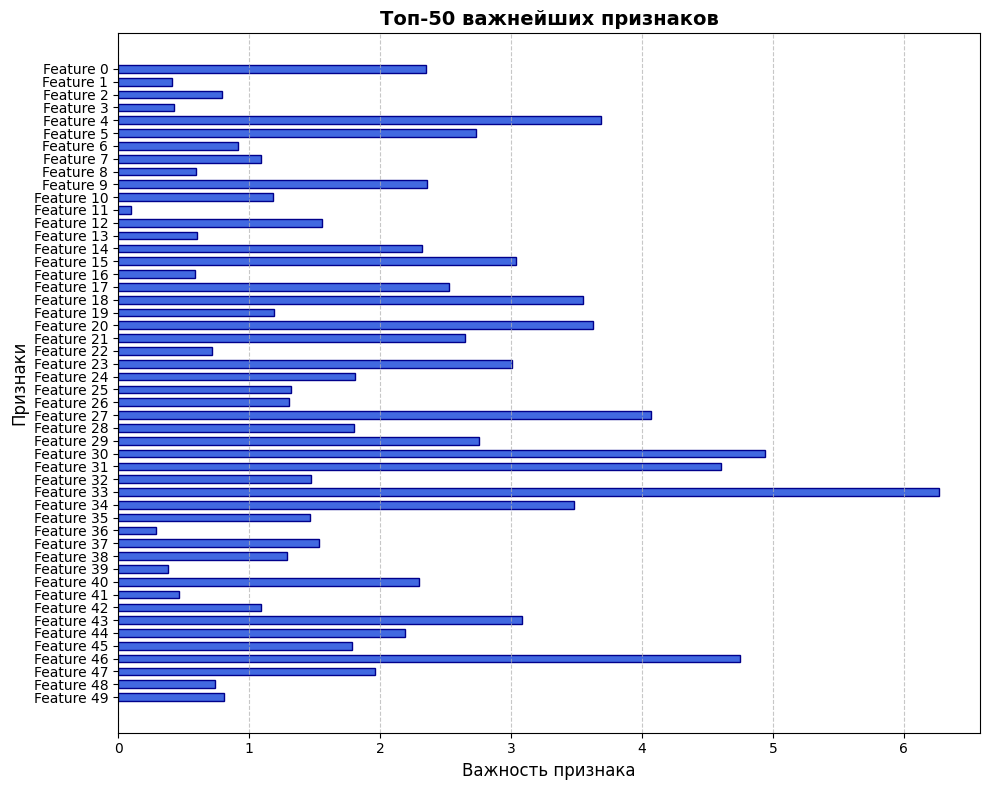

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что у нас есть массив значений важности признаков (model.feature_importances_) из модели CatBoost
feature_importances = model.feature_importances_

# Создаем индексы для каждого признака
indices = np.arange(len(feature_importances))

# Определим количество признаков, которые хотим отобразить
top_n = 50
top_indices = np.argsort(feature_importances)[-top_n:]  # Индексы для топ-N признаков

# Построим горизонтальный бар-график
plt.figure(figsize=(10, 8))
plt.barh(
    indices[top_indices],
    feature_importances[top_indices],
    color='royalblue',           # Устанавливаем синий цвет
    edgecolor='darkblue',        # Темно-синие границы
    height=0.6                    # Задаем ширину баров для более эстетичного вида
)
plt.yticks(indices[top_indices], [f'Feature {i}' for i in top_indices], fontsize=10)
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.title(f'Топ-{top_n} важнейших признаков', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Переворачиваем ось Y для отображения наиболее важного признака сверху
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавляем вертикальные линии сетки

plt.tight_layout()
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import numpy as np

# Примерные данные (замените их на реальные)
# X_train, X_test, y_train, y_test уже определены

# Инициализация базовой модели для RFE
model = LinearRegression()

# Определение количества признаков, которые вы хотите оставить (например, 50)
n_features_to_select = 50

# Применение RFE
selector = RFE(model, n_features_to_select=n_features_to_select, step=1)
selector = selector.fit(X_train, y_train)

# Получаем отфильтрованные наборы данных с выбранными признаками
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Проверка производительности модели на выбранных признаках
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Вычисление метрики для оценки качества
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae:.4f}")

# Выводим индексы отобранных признаков
selected_features = selector.support_
print("Selected Features Indices:", np.where(selected_features)[0])


Mean Absolute Error on Test Set: 0.1582
Selected Features Indices: [   0    1   25   46   51   78   79  105  114  154  186  187  235  262
  877  931 1154 1188 1203 1208 1248 1293 1353 1358 1380 1388 1456 1460
 1576 1584 1808 1827 1833 1835 1841 1868 1876 2046 2058 2067 2069 2072
 2075 2079 2089 2093 2097 2101 2308 2309]


In [16]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import numpy as np

# Примерные данные (замените их на реальные)
# X_train, X_test, y_train, y_test уже определены

# Инициализация модели CatBoost
model = CatBoostRegressor(iterations=400, depth=4, learning_rate=0.1, verbose=0)

# Определение количества признаков, которые вы хотите оставить (например, 50)
n_features_to_select = 50

# Применение RFE с CatBoost
selector = RFE(model, n_features_to_select=n_features_to_select, step=100)
selector = selector.fit(X_train, y_train)

# Получаем отфильтрованные наборы данных с выбранными признаками
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Проверка производительности модели на выбранных признаках
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Вычисление метрики для оценки качества
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae:.4f}")

# Выводим индексы отобранных признаков
selected_features = selector.support_
print("Selected Features Indices:", np.where(selected_features)[0])


Mean Absolute Error on Test Set: 0.1237
Selected Features Indices: [   0   12   16   22   25   26   27   40   43   47   52   53   79  108
  166  187  208  237  241  242  243  268  270  282  290  397  561  621
  697  749  752  823 1253 1431 1510 1511 1578 1622 1654 1813 1857 1872
 1887 1898 2091 2135 2139 2197 2205 2310]


In [30]:
# Фильтрация столбцов DataFrame по значению True в array
df_filtered_train = X_train.loc[:, selected_features]
df_filtered_test = X_test.loc[:, selected_features]



,id,"Суммарное кол-во отзывов в категории ""Косметика"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Сетеваякосметикаидрогери"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ТЦ"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Хозтоварыидом"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Цветы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Кофейня"" в радиусе 300м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 300м","Суммарное кол-во отзывов в категории ""Пунктывыдачи"" в радиусе 300м",...,Максимальный пешеходный трафик сигналов рабочих в радиусе 300м,Максимальный автомобильный трафик сигналов рабочих в радиусе 700м,Средний вечерний пешеходный трафик сигналов рабочих в радиусе 150м,Средний утренний автомобильный трафик сигналов рабочих в радиусе 500м,Суммарный дневной трафик сигналов резидентов в радиусе 500м,Суммарный дневной трафик сигналов рабочих в радиусе 700м,Суммарный дневной трафик сигналов рабочих в радиусе 1000м,Максимальный утренний пешеходный трафик юзеров в радиусе 140м,Средний утренний пешеходный трафик юзеров в радиусе 140м,Суммарный утренний трафик юзеров в радиусе 140м
0,60,10,550,0,12116,208,86,1391,2014,472,...,1416,693,54.100000,52.043478,3329,12061,12061,234,234,665
1,50,1198,7555,746,112229,3139,24,839,7860,110,...,1298,1843,154.444444,84.306122,13719,16755,16755,762,762,882
2,17,166,203,0,0,159,55,1914,1278,54,...,478,842,39.222222,50.510204,2800,7392,7392,58,58,186
3,15,0,523,0,0,0,0,664,527,0,...,1102,12414,54.571429,63.528302,7626,17186,17186,103,103,177
4,74,9,1239,0,24174,3237,0,65,2142,17,...,5485,3138,76.181818,59.313725,12116,15578,15578,161,161,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19,75,66,75,1838,0,0,156,448,0,...,719,1525,2.000000,26.529412,1416,4596,4596,131,131,373
68,66,343,1616,285,0,2422,0,364,1642,32,...,988,9739,47.857143,26.500000,462,11982,11982,307,307,357
69,37,502,1831,149,0,96,20,2548,3580,39,...,1431,655,51.875000,70.271186,3241,13249,13249,641,641,3278
70,54,1642,1196,1471,21173,1365,11,1194,1367,75,...,4332,12208,121.900000,82.760000,8359,29536,29536,370,370,441


In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Инициализация модели CatBoostRegressor
model = CatBoostRegressor(
    iterations=1000,       # Количество итераций
    learning_rate=0.1,     # Скорость обучения
    depth=6,               # Глубина деревьев
    loss_function='RMSE',  # Функция потерь (для регрессии - RMSE)
    verbose=100            # Частота вывода результатов обучения
)

# Обучение модели на тренировочных данных
model.fit(df_filtered_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(df_filtered_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Вычисление R² и Скорректированного R²
r2 = r2_score(y_test, y_pred)
n = len(y_test)  # количество наблюдений
p = X_test.shape[1]  # количество признаков
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление WAPE
wape = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"Скорректированный R²: {r2_adj:.4f}")
print(f"MAPE на тестовых данных: {mape:.2f}%")
print(f"WAPE на тестовых данных: {wape:.2f}%")

0:	learn: 0.1838044	total: 4.34ms	remaining: 4.34s
100:	learn: 0.0154631	total: 354ms	remaining: 3.15s
200:	learn: 0.0034276	total: 677ms	remaining: 2.69s
300:	learn: 0.0010674	total: 996ms	remaining: 2.31s
400:	learn: 0.0002905	total: 1.31s	remaining: 1.96s
500:	learn: 0.0000822	total: 1.65s	remaining: 1.65s
600:	learn: 0.0000230	total: 1.97s	remaining: 1.3s
700:	learn: 0.0000069	total: 2.45s	remaining: 1.05s
800:	learn: 0.0000019	total: 3.19s	remaining: 794ms
900:	learn: 0.0000005	total: 3.85s	remaining: 423ms
999:	learn: 0.0000001	total: 4.42s	remaining: 0us
Mean Absolute Error (MAE): 0.1112
Mean Squared Error (MSE): 0.0228
Root Mean Squared Error (RMSE): 0.1509
R²: -0.0022
Скорректированный R²: 1.0034
MAPE на тестовых данных: 8.16%
WAPE на тестовых данных: 8.38%


In [33]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [34]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Разделим данные на тренировочные и валидационные (можно заменить на свои данные)


# Функция для оптимизации гиперпараметров
def objective(trial):
    # Определение пространства поиска гиперпараметров
    param = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "random_strength": trial.suggest_float("random_strength", 0, 1),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    # Инициализация и обучение модели
    model = CatBoostRegressor(
        **param,
        loss_function="RMSE",
        verbose=0
    )
    model.fit(df_filtered_train, y_train, eval_set=(df_filtered_test, y_test), early_stopping_rounds=50, verbose=False)

    # Предсказание и расчет MAE на валидационном наборе
    y_val_pred = model.predict(df_filtered_test)
    mae = mean_absolute_error(y_test, y_val_pred)

    return mae

# Запуск оптимизации
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Лучшие параметры
print("Best hyperparameters: ", study.best_params)
print("Best MAE: ", study.best_value)


[I 2024-11-12 15:59:23,621] A new study created in memory with name: no-name-cad6ecd7-89fa-4bea-b58b-7964663cc33f


  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 15:59:41,919] Trial 0 finished with value: 0.10410467869390223 and parameters: {'iterations': 1167, 'depth': 9, 'learning_rate': 0.007331841522441714, 'l2_leaf_reg': 0.0069104303609181265, 'bagging_temperature': 0.8978861213874625, 'random_strength': 0.42040766563588405, 'border_count': 111, 'min_data_in_leaf': 87}. Best is trial 0 with value: 0.10410467869390223.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 15:59:42,774] Trial 1 finished with value: 0.10362316179226057 and parameters: {'iterations': 1556, 'depth': 6, 'learning_rate': 0.03346929772067425, 'l2_leaf_reg': 0.0033496865138403498, 'bagging_temperature': 0.7440388239353762, 'random_strength': 0.7117013546364671, 'border_count': 238, 'min_data_in_leaf': 87}. Best is trial 1 with value: 0.10362316179226057.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),
<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_lo

[I 2024-11-12 15:59:45,845] Trial 2 finished with value: 0.10994473865542147 and parameters: {'iterations': 787, 'depth': 9, 'learning_rate': 0.021397987235886238, 'l2_leaf_reg': 0.6448708409884328, 'bagging_temperature': 0.270272789996443, 'random_strength': 0.07816260890314886, 'border_count': 142, 'min_data_in_leaf': 49}. Best is trial 1 with value: 0.10362316179226057.
[I 2024-11-12 15:59:46,011] Trial 3 finished with value: 0.09637891720517062 and parameters: {'iterations': 649, 'depth': 4, 'learning_rate': 0.09180728551011474, 'l2_leaf_reg': 0.5249771517811465, 'bagging_temperature': 0.638753709189856, 'random_strength': 0.5889756201969428, 'border_count': 44, 'min_data_in_leaf': 41}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:15,607] Trial 4 finished with value: 0.13765259477594408 and parameters: {'iterations': 1434, 'depth': 9, 'learning_rate': 0.00012941917869051773, 'l2_leaf_reg': 0.001642294809975168, 'bagging_temperature': 0.7352012030009616, 'random_strength': 0.9403662544471383, 'border_count': 62, 'min_data_in_leaf': 100}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:18,032] Trial 5 finished with value: 0.13643761304332525 and parameters: {'iterations': 1685, 'depth': 4, 'learning_rate': 0.00010760707787721018, 'l2_leaf_reg': 0.6635453422897497, 'bagging_temperature': 0.05827896122676912, 'random_strength': 0.7790605781263253, 'border_count': 190, 'min_data_in_leaf': 22}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:18,704] Trial 6 finished with value: 0.10007088655845947 and parameters: {'iterations': 1772, 'depth': 6, 'learning_rate': 0.02195854271603882, 'l2_leaf_reg': 0.14973405689075694, 'bagging_temperature': 0.3874973015787069, 'random_strength': 0.22797534530991392, 'border_count': 213, 'min_data_in_leaf': 11}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:23,062] Trial 7 finished with value: 0.12995390417024388 and parameters: {'iterations': 854, 'depth': 6, 'learning_rate': 0.0007220080791581952, 'l2_leaf_reg': 2.1894536516039405, 'bagging_temperature': 0.5345797893101533, 'random_strength': 0.9624460881727382, 'border_count': 252, 'min_data_in_leaf': 17}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:33,741] Trial 8 finished with value: 0.13534218864239642 and parameters: {'iterations': 834, 'depth': 9, 'learning_rate': 0.0003156570941393004, 'l2_leaf_reg': 0.0049184396175915015, 'bagging_temperature': 0.7799475892835757, 'random_strength': 0.4245432195561972, 'border_count': 42, 'min_data_in_leaf': 62}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:38,760] Trial 9 finished with value: 0.13742967022627736 and parameters: {'iterations': 545, 'depth': 6, 'learning_rate': 0.0002828903968469289, 'l2_leaf_reg': 0.04059727313843811, 'bagging_temperature': 0.21035010038734114, 'random_strength': 0.9611409269328292, 'border_count': 130, 'min_data_in_leaf': 86}. Best is trial 3 with value: 0.09637891720517062.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:39,448] Trial 10 finished with value: 0.0884990200306961 and parameters: {'iterations': 1175, 'depth': 4, 'learning_rate': 0.09523315967211103, 'l2_leaf_reg': 7.739701635780854, 'bagging_temperature': 0.5731811834371475, 'random_strength': 0.6287442476677951, 'border_count': 87, 'min_data_in_leaf': 40}. Best is trial 10 with value: 0.0884990200306961.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:40,107] Trial 11 finished with value: 0.08820968631366916 and parameters: {'iterations': 1273, 'depth': 4, 'learning_rate': 0.09683083454097291, 'l2_leaf_reg': 9.13692107681003, 'bagging_temperature': 0.5219583147753071, 'random_strength': 0.6096615024875853, 'border_count': 89, 'min_data_in_leaf': 41}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:40,841] Trial 12 finished with value: 0.09042276815487076 and parameters: {'iterations': 1168, 'depth': 4, 'learning_rate': 0.09087538920726579, 'l2_leaf_reg': 9.270571787288821, 'bagging_temperature': 0.5018787054245324, 'random_strength': 0.5846072631031738, 'border_count': 91, 'min_data_in_leaf': 36}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:50,198] Trial 13 finished with value: 0.10521303063554292 and parameters: {'iterations': 1341, 'depth': 5, 'learning_rate': 0.0034039399541032946, 'l2_leaf_reg': 6.890732990446896, 'bagging_temperature': 0.9919113848517129, 'random_strength': 0.7341069402925795, 'border_count': 83, 'min_data_in_leaf': 63}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:54,415] Trial 14 finished with value: 0.09345254636070255 and parameters: {'iterations': 1044, 'depth': 5, 'learning_rate': 0.0076183456675684895, 'l2_leaf_reg': 2.343652354039895, 'bagging_temperature': 0.4027702477163879, 'random_strength': 0.2605399372461268, 'border_count': 173, 'min_data_in_leaf': 30}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:56,912] Trial 15 finished with value: 0.09661799913610472 and parameters: {'iterations': 1972, 'depth': 7, 'learning_rate': 0.046617606288757295, 'l2_leaf_reg': 3.2541145692875215, 'bagging_temperature': 0.5719009465935962, 'random_strength': 0.530759891021494, 'border_count': 102, 'min_data_in_leaf': 4}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:00:58,522] Trial 16 finished with value: 0.1087170356375278 and parameters: {'iterations': 1041, 'depth': 5, 'learning_rate': 0.00886282167375169, 'l2_leaf_reg': 0.04372251172914245, 'bagging_temperature': 0.3551342349111267, 'random_strength': 0.651781074515101, 'border_count': 72, 'min_data_in_leaf': 61}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:10,396] Trial 17 finished with value: 0.11323975147239929 and parameters: {'iterations': 1447, 'depth': 8, 'learning_rate': 0.0019455085107289321, 'l2_leaf_reg': 0.2179592959034787, 'bagging_temperature': 0.6558268385586742, 'random_strength': 0.8338752085754871, 'border_count': 123, 'min_data_in_leaf': 52}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:10,665] Trial 18 finished with value: 0.08833085535447542 and parameters: {'iterations': 1266, 'depth': 4, 'learning_rate': 0.05135562967721541, 'l2_leaf_reg': 1.271949832407767, 'bagging_temperature': 0.10947201412208285, 'random_strength': 0.42753486468629126, 'border_count': 151, 'min_data_in_leaf': 28}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:19,920] Trial 19 finished with value: 0.11248559114335212 and parameters: {'iterations': 1314, 'depth': 10, 'learning_rate': 0.015324180873633204, 'l2_leaf_reg': 1.3619293504841945, 'bagging_temperature': 0.04280093946740127, 'random_strength': 0.4277039692469137, 'border_count': 164, 'min_data_in_leaf': 23}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:21,260] Trial 20 finished with value: 0.10419026574458765 and parameters: {'iterations': 964, 'depth': 7, 'learning_rate': 0.045448913058730986, 'l2_leaf_reg': 4.067892963655089, 'bagging_temperature': 0.1891986774424591, 'random_strength': 0.29084135817695556, 'border_count': 159, 'min_data_in_leaf': 1}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:21,527] Trial 21 finished with value: 0.08899350101687713 and parameters: {'iterations': 1220, 'depth': 4, 'learning_rate': 0.08742851675727402, 'l2_leaf_reg': 7.235984628623593, 'bagging_temperature': 0.4592484167775063, 'random_strength': 0.4898518001329847, 'border_count': 111, 'min_data_in_leaf': 40}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:21,923] Trial 22 finished with value: 0.10202379995751706 and parameters: {'iterations': 1523, 'depth': 5, 'learning_rate': 0.05273606410283646, 'l2_leaf_reg': 1.4341365874268022, 'bagging_temperature': 0.6110384450242295, 'random_strength': 0.34097409038420423, 'border_count': 63, 'min_data_in_leaf': 49}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:22,455] Trial 23 finished with value: 0.0935727071900116 and parameters: {'iterations': 1105, 'depth': 4, 'learning_rate': 0.030132344877566927, 'l2_leaf_reg': 9.7315849495422, 'bagging_temperature': 0.30789317920194453, 'random_strength': 0.6365222930963097, 'border_count': 141, 'min_data_in_leaf': 30}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:22,831] Trial 24 finished with value: 0.10690700962845948 and parameters: {'iterations': 1299, 'depth': 5, 'learning_rate': 0.06319804624816217, 'l2_leaf_reg': 3.670158322848889, 'bagging_temperature': 0.14902443009199892, 'random_strength': 0.175240159262543, 'border_count': 192, 'min_data_in_leaf': 32}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:23,281] Trial 25 finished with value: 0.10297918389184273 and parameters: {'iterations': 970, 'depth': 4, 'learning_rate': 0.013910549679804686, 'l2_leaf_reg': 1.0406801656073492, 'bagging_temperature': 0.45571175127745406, 'random_strength': 0.8356299561284299, 'border_count': 91, 'min_data_in_leaf': 72}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:24,889] Trial 26 finished with value: 0.10783888301584924 and parameters: {'iterations': 1640, 'depth': 5, 'learning_rate': 0.002850400582882967, 'l2_leaf_reg': 0.2785884162876811, 'bagging_temperature': 0.10828573966171877, 'random_strength': 0.5187596245295941, 'border_count': 125, 'min_data_in_leaf': 43}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:25,259] Trial 27 finished with value: 0.09126934139050186 and parameters: {'iterations': 1400, 'depth': 4, 'learning_rate': 0.03205526247897909, 'l2_leaf_reg': 3.8182393746885466, 'bagging_temperature': 0.8340786077986366, 'random_strength': 0.3449558463805384, 'border_count': 150, 'min_data_in_leaf': 21}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:25,607] Trial 28 finished with value: 0.10983339882017416 and parameters: {'iterations': 1260, 'depth': 5, 'learning_rate': 0.059743718338699965, 'l2_leaf_reg': 0.05093562516219632, 'bagging_temperature': 0.27184189111987433, 'random_strength': 0.6795479389024759, 'border_count': 75, 'min_data_in_leaf': 57}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:28,948] Trial 29 finished with value: 0.10287711540042542 and parameters: {'iterations': 1169, 'depth': 7, 'learning_rate': 0.01319585478445426, 'l2_leaf_reg': 5.350512175877839, 'bagging_temperature': 0.6618116490192905, 'random_strength': 0.486843416234993, 'border_count': 111, 'min_data_in_leaf': 70}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:30,173] Trial 30 finished with value: 0.10646162881548318 and parameters: {'iterations': 936, 'depth': 4, 'learning_rate': 0.004861488393443183, 'l2_leaf_reg': 0.36448719439055693, 'bagging_temperature': 0.544842801175583, 'random_strength': 0.5761960505865268, 'border_count': 51, 'min_data_in_leaf': 14}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:30,540] Trial 31 finished with value: 0.09677435148897781 and parameters: {'iterations': 1157, 'depth': 4, 'learning_rate': 0.09677829008435439, 'l2_leaf_reg': 6.201586735082936, 'bagging_temperature': 0.4342842527486236, 'random_strength': 0.43885232332792584, 'border_count': 106, 'min_data_in_leaf': 41}. Best is trial 11 with value: 0.08820968631366916.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:31,020] Trial 32 finished with value: 0.08250132302932855 and parameters: {'iterations': 1235, 'depth': 4, 'learning_rate': 0.0690240279308758, 'l2_leaf_reg': 2.3688607334031686, 'bagging_temperature': 0.45612086601919555, 'random_strength': 0.36789258201459596, 'border_count': 95, 'min_data_in_leaf': 36}. Best is trial 32 with value: 0.08250132302932855.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:31,753] Trial 33 finished with value: 0.10405192581982003 and parameters: {'iterations': 1546, 'depth': 5, 'learning_rate': 0.0333470540932877, 'l2_leaf_reg': 0.012723946173667977, 'bagging_temperature': 0.7227378542985352, 'random_strength': 0.36101502003135255, 'border_count': 97, 'min_data_in_leaf': 28}. Best is trial 32 with value: 0.08250132302932855.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:32,294] Trial 34 finished with value: 0.08120150792646746 and parameters: {'iterations': 1091, 'depth': 4, 'learning_rate': 0.06411381751468419, 'l2_leaf_reg': 2.1098090489140024, 'bagging_temperature': 0.32501040946392923, 'random_strength': 0.037025389558296984, 'border_count': 137, 'min_data_in_leaf': 48}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:32,666] Trial 35 finished with value: 0.0900750139479226 and parameters: {'iterations': 1059, 'depth': 4, 'learning_rate': 0.022012395740549518, 'l2_leaf_reg': 0.8312212210898323, 'bagging_temperature': 0.3193024652256888, 'random_strength': 0.05579224257521576, 'border_count': 137, 'min_data_in_leaf': 47}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:33,122] Trial 36 finished with value: 0.09273037588050559 and parameters: {'iterations': 734, 'depth': 6, 'learning_rate': 0.058442920158375086, 'l2_leaf_reg': 2.2533511685514958, 'bagging_temperature': 0.011402422928988742, 'random_strength': 0.0009489651213616668, 'border_count': 32, 'min_data_in_leaf': 55}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:34,447] Trial 37 finished with value: 0.10444946127588312 and parameters: {'iterations': 1454, 'depth': 8, 'learning_rate': 0.03784912001804615, 'l2_leaf_reg': 0.5395937081966152, 'bagging_temperature': 0.2379080742185807, 'random_strength': 0.22489664032721637, 'border_count': 189, 'min_data_in_leaf': 36}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:34,963] Trial 38 finished with value: 0.09314110425880356 and parameters: {'iterations': 1259, 'depth': 5, 'learning_rate': 0.0235963972562524, 'l2_leaf_reg': 1.602699665316392, 'bagging_temperature': 0.35260721490567737, 'random_strength': 0.1393627041279542, 'border_count': 176, 'min_data_in_leaf': 47}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:35,218] Trial 39 finished with value: 0.08989934243863848 and parameters: {'iterations': 898, 'depth': 4, 'learning_rate': 0.0630100827077581, 'l2_leaf_reg': 0.09613090248961872, 'bagging_temperature': 0.11252332122113418, 'random_strength': 0.13840544834660862, 'border_count': 152, 'min_data_in_leaf': 25}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:36,177] Trial 40 finished with value: 0.1002544797033636 and parameters: {'iterations': 1351, 'depth': 6, 'learning_rate': 0.016877190838315716, 'l2_leaf_reg': 0.933990665101336, 'bagging_temperature': 0.4926052675278745, 'random_strength': 0.38190715128913155, 'border_count': 208, 'min_data_in_leaf': 36}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:36,446] Trial 41 finished with value: 0.10315724047900944 and parameters: {'iterations': 1203, 'depth': 4, 'learning_rate': 0.09884991025823713, 'l2_leaf_reg': 2.58973274467784, 'bagging_temperature': 0.5928005031494672, 'random_strength': 0.7272533716866303, 'border_count': 61, 'min_data_in_leaf': 44}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:36,738] Trial 42 finished with value: 0.08989592102814041 and parameters: {'iterations': 1132, 'depth': 4, 'learning_rate': 0.07968018855932152, 'l2_leaf_reg': 5.26411508502217, 'bagging_temperature': 0.502499452443265, 'random_strength': 0.6202464273901879, 'border_count': 118, 'min_data_in_leaf': 36}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:37,020] Trial 43 finished with value: 0.0946658625485547 and parameters: {'iterations': 1087, 'depth': 4, 'learning_rate': 0.04397987676792208, 'l2_leaf_reg': 1.701052682984426, 'bagging_temperature': 0.6884123288036786, 'random_strength': 0.5479043911284723, 'border_count': 81, 'min_data_in_leaf': 39}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:37,452] Trial 44 finished with value: 0.10065384527120139 and parameters: {'iterations': 1394, 'depth': 5, 'learning_rate': 0.06793311293203204, 'l2_leaf_reg': 4.8324150472772915, 'bagging_temperature': 0.38955712036081475, 'random_strength': 0.786048246082513, 'border_count': 135, 'min_data_in_leaf': 18}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:38,983] Trial 45 finished with value: 0.10782683118425819 and parameters: {'iterations': 1004, 'depth': 4, 'learning_rate': 0.0012374857379177403, 'l2_leaf_reg': 0.4085181843858069, 'bagging_temperature': 0.5452838034990444, 'random_strength': 0.4656262231957849, 'border_count': 87, 'min_data_in_leaf': 52}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:39,550] Trial 46 finished with value: 0.0999639680049315 and parameters: {'iterations': 1245, 'depth': 4, 'learning_rate': 0.027939429475249106, 'l2_leaf_reg': 9.313446057555147, 'bagging_temperature': 0.7971496528924797, 'random_strength': 0.6870926484030362, 'border_count': 98, 'min_data_in_leaf': 27}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:40,642] Trial 47 finished with value: 0.10807022121425772 and parameters: {'iterations': 1624, 'depth': 6, 'learning_rate': 0.010717846590524709, 'l2_leaf_reg': 2.76215584775776, 'bagging_temperature': 0.4195469586823471, 'random_strength': 0.6060360209355204, 'border_count': 68, 'min_data_in_leaf': 32}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:40,971] Trial 48 finished with value: 0.0919887447659733 and parameters: {'iterations': 1822, 'depth': 5, 'learning_rate': 0.042465099361883925, 'l2_leaf_reg': 0.6732417053967058, 'bagging_temperature': 0.6154938281579015, 'random_strength': 0.2875928645897501, 'border_count': 53, 'min_data_in_leaf': 10}. Best is trial 34 with value: 0.08120150792646746.


<ipython-input-34-3977e9325678>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
<ipython-input-34-3977e9325678>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),


[I 2024-11-12 16:01:50,695] Trial 49 finished with value: 0.13111685951735774 and parameters: {'iterations': 825, 'depth': 8, 'learning_rate': 0.000498088387709528, 'l2_leaf_reg': 0.010857576483422119, 'bagging_temperature': 0.4900737294948519, 'random_strength': 0.5486828709781029, 'border_count': 120, 'min_data_in_leaf': 99}. Best is trial 34 with value: 0.08120150792646746.
Best hyperparameters:  {'iterations': 1091, 'depth': 4, 'learning_rate': 0.06411381751468419, 'l2_leaf_reg': 2.1098090489140024, 'bagging_temperature': 0.32501040946392923, 'random_strength': 0.037025389558296984, 'border_count': 137, 'min_data_in_leaf': 48}
Best MAE:  0.08120150792646746


In [35]:
# Инициализация и обучение модели
model_best = CatBoostRegressor(
    **study.best_params,
    loss_function="RMSE",
    verbose=0
)
model.fit(df_filtered_train, y_train, eval_set=(df_filtered_test, y_test), early_stopping_rounds=50, verbose=False)

# Предсказание и расчет MAE на валидационном наборе


y_pred_best = model.predict(df_filtered_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)

# Вычисление R² и Скорректированного R²
r2 = r2_score(y_test, y_pred_best)
n = len(y_test)  # количество наблюдений
p = X_test.shape[1]  # количество признаков
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

# Вычисление WAPE
wape = np.sum(np.abs(y_test - y_pred_best)) / np.sum(np.abs(y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"Скорректированный R²: {r2_adj:.4f}")
print(f"MAPE на тестовых данных: {mape:.2f}%")
print(f"WAPE на тестовых данных: {wape:.2f}%")

Mean Absolute Error (MAE): 0.1071
Mean Squared Error (MSE): 0.0209
Root Mean Squared Error (RMSE): 0.1444
R²: 0.0824
Скорректированный R²: 1.0032
MAPE на тестовых данных: 7.81%
WAPE на тестовых данных: 8.07%


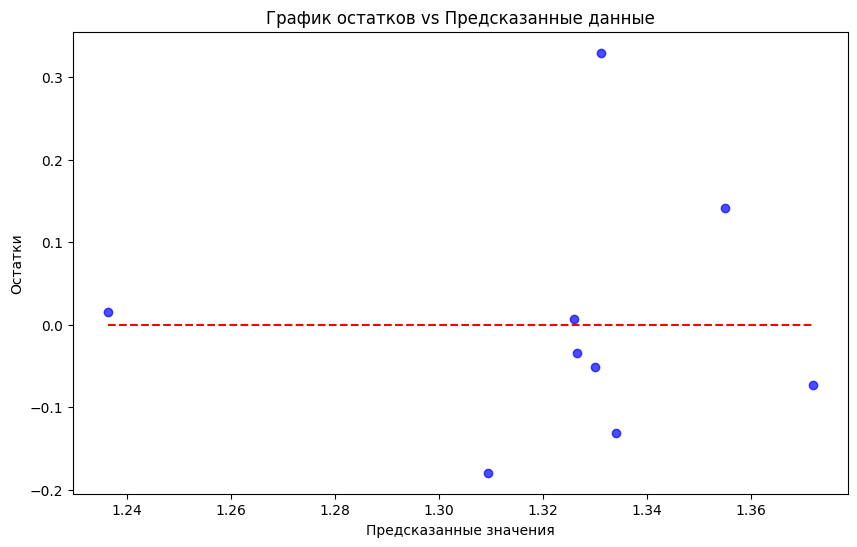

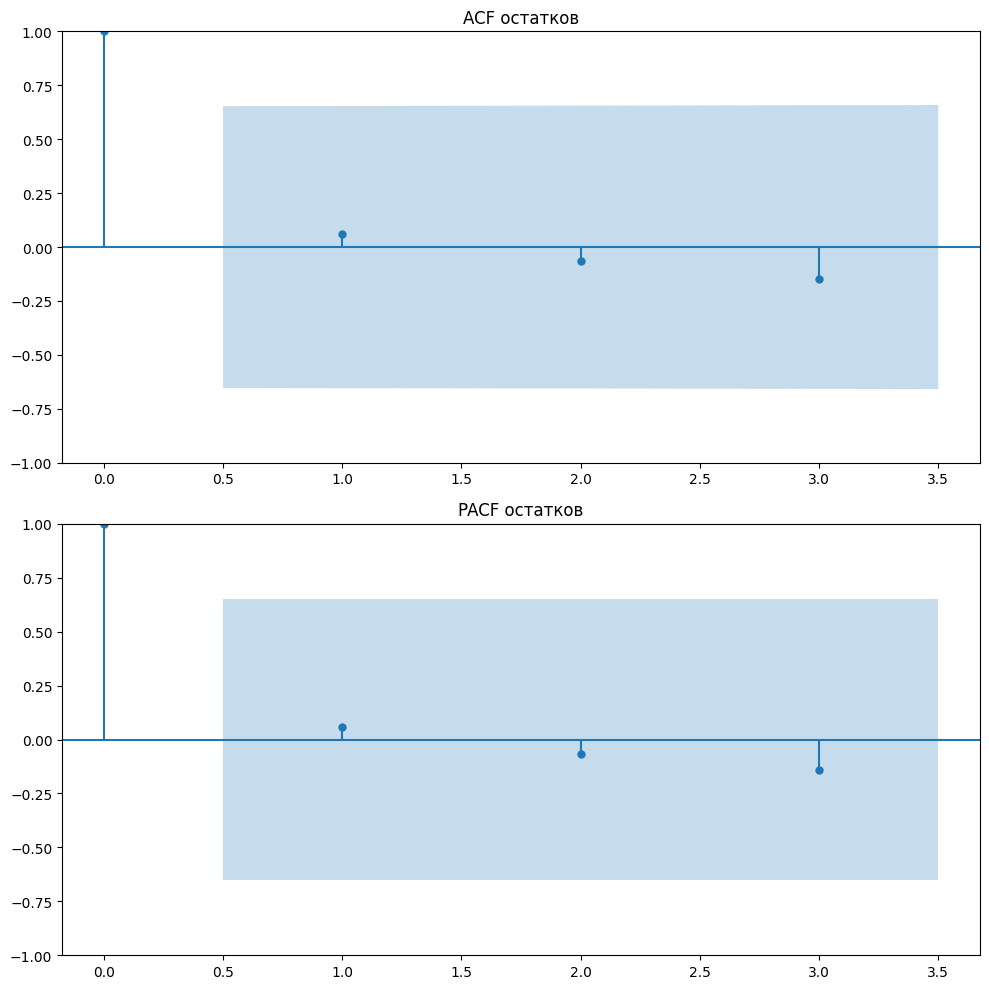

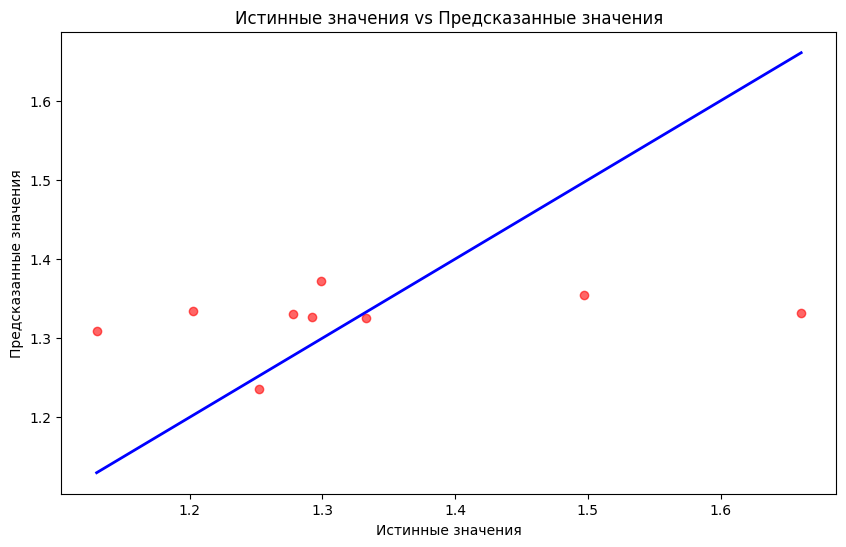

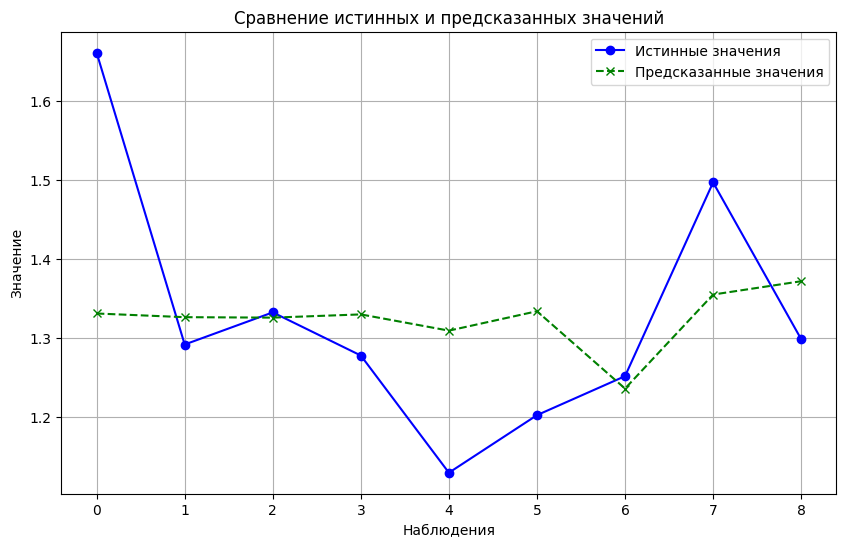

    lb_stat  lb_pvalue
3  0.459138   0.927772
P-value = 0.92777. Остатки не являются статистически значимыми и ведут себя как белый шум.
RMSE на тестовых данных: 0.14441892091458514
Скорректированный R²: 1.0031560726597895
MAPE на тестовых данных: 7.805529563818912
WAPE на тестовых данных: 8.07293866290477


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Вычисляем остатки (разница между фактическими и предсказанными значениями)
residuals = y_test - y_pred_best

# Построение графика остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.7, color="b")
plt.hlines(0, min(y_pred_best), max(y_pred_best), colors='r', linestyles='dashed')
plt.title('График остатков vs Предсказанные данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()

# Построим графики ACF и PACF для остатков
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plot_acf(residuals, ax=ax[0], lags=3)
ax[0].set_title('ACF остатков')
plot_pacf(residuals, ax=ax[1], lags=3)
ax[1].set_title('PACF остатков')
plt.tight_layout()
plt.show()

# Построим точечный график истинных значений и предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='red', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title('Истинные значения vs Предсказанные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()

import matplotlib.pyplot as plt

# Построим график истинных значений и предсказанных для Leave-One-Out
plt.figure(figsize=(10, 6))

# Линия истинных значений
plt.plot(y_test.values, label='Истинные значения', color='blue', marker='o', linestyle='-')

# Линия предсказанных значений
plt.plot(y_pred_best, label='Предсказанные значения', color='green', marker='x', linestyle='--')

# Настройки графика
plt.title('Сравнение истинных и предсказанных значений')
plt.xlabel('Наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


# Выводим метрики для тестового набора
rmse = mean_squared_error(y_test, y_pred_best, squared=False)
r2 = r2_score(y_test, y_pred_best)

# Количество наблюдений
n = len(y_test)

# Количество признаков (p)
p = X_test.shape[1]

# Вычисляем скорректированный R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = mean_absolute_percentage_error(y_test, y_pred_best) * 100
wape = np.sum(np.abs(y_test - y_pred_best)) / np.sum(np.abs(y_test)) * 100


from statsmodels.stats.diagnostic import acorr_ljungbox
# Тест Ljung-Box на белый шум
ljung_box_result = acorr_ljungbox(residuals, lags=[3], return_df=True)

# Вывод результата теста Ljung-Box
print(ljung_box_result)
# Интерпретация результатов теста Ljung-Box
p_value = ljung_box_result['lb_pvalue'].iloc[0]

if p_value > 0.05:
    print(f"P-value = {p_value:.5f}. Остатки не являются статистически значимыми и ведут себя как белый шум.")
else:
    print(f"P-value = {p_value:.5f}. Остатки статистически значимы, и есть автокорреляция (не белый шум).")


print(f"RMSE на тестовых данных: {rmse}")
print(f"Скорректированный R²: {r2_adj}")
print(f"MAPE на тестовых данных: {mape}")
print(f"WAPE на тестовых данных: {wape}")